In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# 2330
df = pd.read_csv('2330.TW.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,69.649033,69.649033,68.475182,69.649033,35.597221,2.006623e+11
1,2000-01-05,69.649033,71.214043,68.866341,71.214043,36.397091,4.024668e+11
2,2000-01-06,70.822884,71.214043,69.649033,69.649033,35.597221,1.975457e+11
3,2000-01-07,67.301331,68.475182,66.518639,67.692490,34.597237,2.352703e+11
4,2000-01-10,69.649033,70.431351,68.475182,70.040192,35.797142,2.761717e+11
...,...,...,...,...,...,...,...
5720,2022-11-18,491.500000,494.000000,486.000000,487.000000,487.000000,3.585972e+07
5721,2022-11-21,487.500000,489.500000,480.500000,482.000000,482.000000,2.971018e+07
5722,2022-11-22,476.000000,491.000000,476.000000,491.000000,491.000000,3.734313e+07
5723,2022-11-23,494.500000,496.000000,488.500000,492.000000,492.000000,3.347534e+07


In [3]:
n = 20

In [4]:
df = df.loc[df['Date'] > '2019-10-01']
len(df)

771

In [5]:
df['Volume'].fillna(0).astype('int')

4954    29295953
4955    31890864
4956    35169613
4957    17510230
4958    35278551
          ...   
5720    35859717
5721    29710180
5722    37343127
5723    33475337
5724    27396552
Name: Volume, Length: 771, dtype: int64

In [6]:
df['Volume'].fillna(0).astype('int').apply(lambda x: x/1000)

4954    29295.953
4955    31890.864
4956    35169.613
4957    17510.230
4958    35278.551
          ...    
5720    35859.717
5721    29710.180
5722    37343.127
5723    33475.337
5724    27396.552
Name: Volume, Length: 771, dtype: float64

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

/tmp/ipykernel_8491/2394721818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 771 entries, 4954 to 5724
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       771 non-null    datetime64[ns]
 1   Open       771 non-null    float64       
 2   High       771 non-null    float64       
 3   Low        771 non-null    float64       
 4   Close      771 non-null    float64       
 5   Adj Close  771 non-null    float64       
 6   Volume     771 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 48.2 KB


<AxesSubplot: xlabel='Date'>

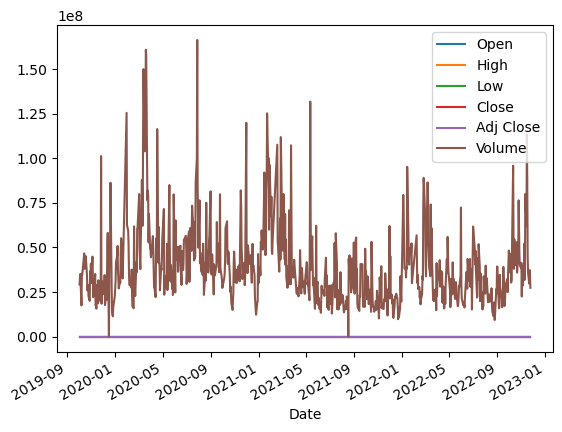

In [9]:
df.plot(x='Date')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

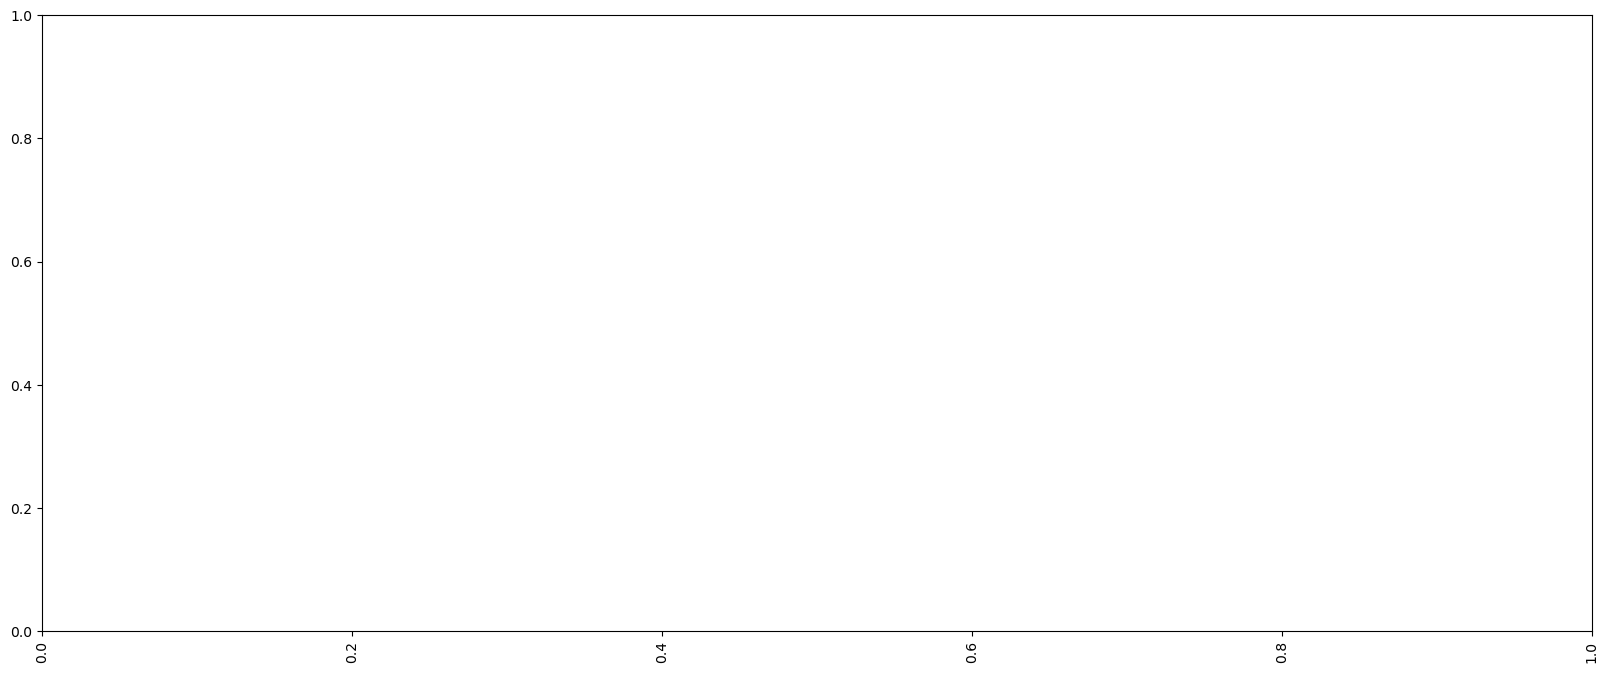

In [10]:
fig = plt.figure(figsize=(20,8))
plt.xticks(rotation=90)

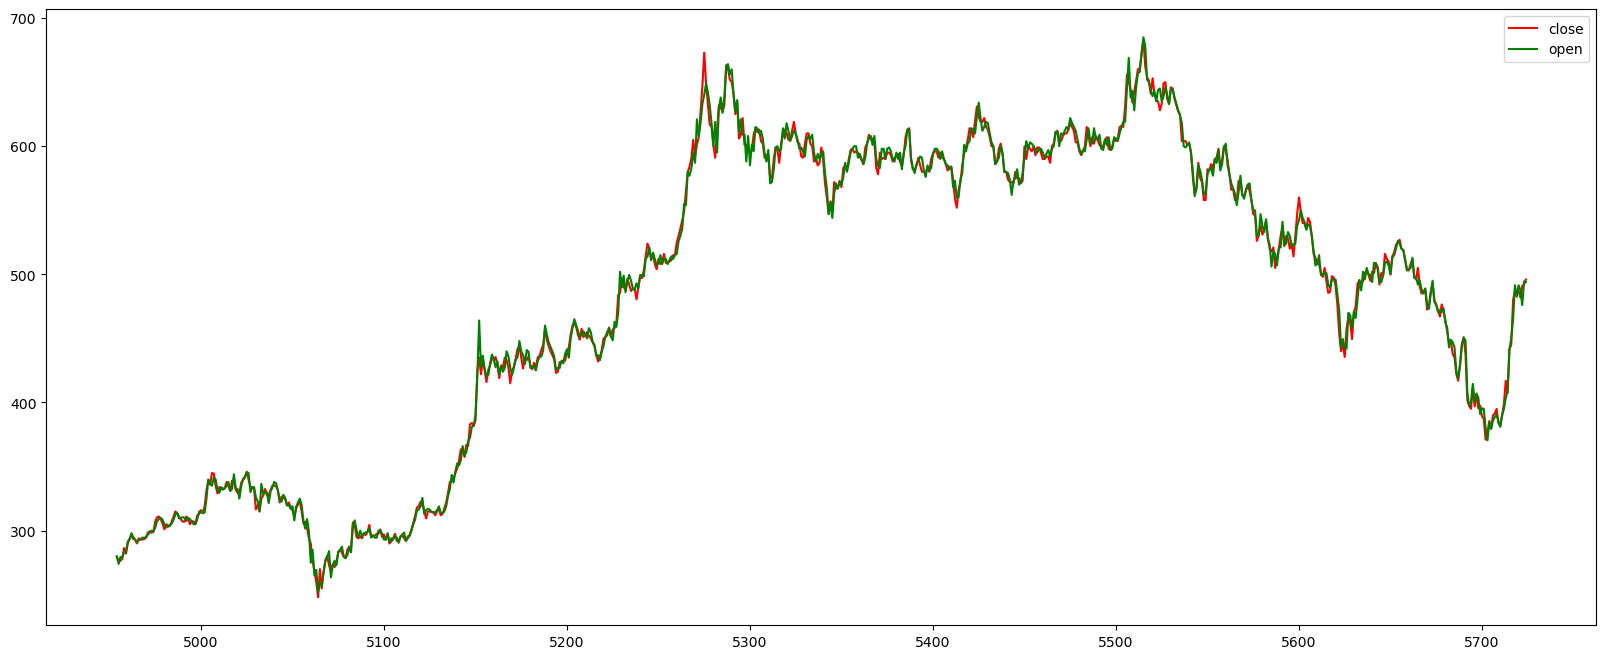

In [11]:
fig = plt.figure(figsize=(20,8))
# plt.xticks(rotation=90)
ax1 = fig.add_subplot(111)
ax1.plot(df['Close'], color='red', label='close')
ax1.plot(df['Open'], color='green', label='open')
plt.legend()
#ax2 = ax1.twinx()
#plt.bar(df['Date'], df['Volume'].fillna(0).astype('int')//100000)
#ax3 = ax1.twinx()
plt.show()

In [12]:
total_cnt = len(df)
test_cnt = int(total_cnt*0.3)
test_cnt

231

In [13]:
#test_data = df.loc[df['Date'] > '2020-10-01']
test_data = df[0:test_cnt]
test_data

,Date,Open,High,Low,Close,Adj Close,Volume
4954,2019-10-02,280.0,281.0,279.0,279.5,260.930786,29295953.0
4955,2019-10-03,274.0,277.5,274.0,276.5,258.130096,31890864.0
4956,2019-10-04,279.5,280.0,275.0,276.5,258.130096,35169613.0
4957,2019-10-07,279.0,279.5,277.5,278.0,259.530365,17510230.0
4958,2019-10-08,283.5,286.5,282.5,286.5,267.465668,35278551.0
...,...,...,...,...,...,...,...
5180,2020-09-04,427.0,432.5,427.0,429.0,410.601440,46119911.0
5181,2020-09-07,428.0,432.5,425.0,426.0,407.730164,32019312.0
5182,2020-09-08,428.0,433.0,427.5,431.0,412.515686,23714670.0
5183,2020-09-09,425.0,428.0,423.0,427.0,408.687225,40551362.0


In [14]:
train_data = df[:len(df)-len(test_data)]
train_data

,Date,Open,High,Low,Close,Adj Close,Volume
4954,2019-10-02,280.0,281.0,279.0,279.5,260.930786,29295953.0
4955,2019-10-03,274.0,277.5,274.0,276.5,258.130096,31890864.0
4956,2019-10-04,279.5,280.0,275.0,276.5,258.130096,35169613.0
4957,2019-10-07,279.0,279.5,277.5,278.0,259.530365,17510230.0
4958,2019-10-08,283.5,286.5,282.5,286.5,267.465668,35278551.0
...,...,...,...,...,...,...,...
5489,2021-12-09,606.0,608.0,602.0,608.0,595.545349,11039070.0
5490,2021-12-10,605.0,608.0,602.0,605.0,592.606750,10497451.0
5491,2021-12-13,609.0,610.0,601.0,601.0,588.688782,17711657.0
5492,2021-12-14,598.0,600.0,597.0,599.0,586.729675,22579034.0


In [15]:
# test_set = test_data['Open']
test_set = test_data['Close']
test_set

4954    279.5
4955    276.5
4956    276.5
4957    278.0
4958    286.5
        ...  
5180    429.0
5181    426.0
5182    431.0
5183    427.0
5184    435.0
Name: Close, Length: 231, dtype: float64

In [16]:
# train_set = train_data['Open']
train_set = train_data['Close']
print(type(train_set))
print(len(train_set))
train_set

<class 'pandas.core.series.Series'>
540


4954    279.5
4955    276.5
4956    276.5
4957    278.0
4958    286.5
        ...  
5489    608.0
5490    605.0
5491    601.0
5492    599.0
5493    600.0
Name: Close, Length: 540, dtype: float64

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
sc = MinMaxScaler(feature_range=(0,1))

In [19]:
train_set = train_set.values.reshape(-1,1)
print(len(train_set))
print(type(train_set))
train_set

540
<class 'numpy.ndarray'>


array([[279.5],
       [276.5],
       [276.5],
       [278. ],
       [286.5],
       [282. ],
       [290. ],
       [293.5],
       [296.5],
       [293.5],
       [293. ],
       [290. ],
       [294. ],
       [293. ],
       [293. ],
       [293.5],
       [294.5],
       [298.5],
       [299.5],
       [298.5],
       [299. ],
       [307. ],
       [310.5],
       [311. ],
       [309. ],
       [305.5],
       [301. ],
       [305. ],
       [304. ],
       [303.5],
       [307. ],
       [311. ],
       [315. ],
       [313.5],
       [311. ],
       [309. ],
       [307. ],
       [307. ],
       [311. ],
       [309.5],
       [305. ],
       [307.5],
       [307. ],
       [306. ],
       [312. ],
       [313. ],
       [316. ],
       [313.5],
       [319. ],
       [331.5],
       [339. ],
       [336. ],
       [345. ],
       [344.5],
       [335. ],
       [329. ],
       [334. ],
       [332. ],
       [333. ],
       [333. ],
       [338. ],
       [334.5],
       [

In [20]:
train_set_sc = sc.fit_transform(train_set)
train_set_sc

array([[0.07411765],
       [0.06705882],
       [0.06705882],
       [0.07058824],
       [0.09058824],
       [0.08      ],
       [0.09882353],
       [0.10705882],
       [0.11411765],
       [0.10705882],
       [0.10588235],
       [0.09882353],
       [0.10823529],
       [0.10588235],
       [0.10588235],
       [0.10705882],
       [0.10941176],
       [0.11882353],
       [0.12117647],
       [0.11882353],
       [0.12      ],
       [0.13882353],
       [0.14705882],
       [0.14823529],
       [0.14352941],
       [0.13529412],
       [0.12470588],
       [0.13411765],
       [0.13176471],
       [0.13058824],
       [0.13882353],
       [0.14823529],
       [0.15764706],
       [0.15411765],
       [0.14823529],
       [0.14352941],
       [0.13882353],
       [0.13882353],
       [0.14823529],
       [0.14470588],
       [0.13411765],
       [0.14      ],
       [0.13882353],
       [0.13647059],
       [0.15058824],
       [0.15294118],
       [0.16      ],
       [0.154

In [21]:
x_train = []
y_train = []

In [22]:
train_set_sc[0:19, 0]

array([0.07411765, 0.06705882, 0.06705882, 0.07058824, 0.09058824,
       0.08      , 0.09882353, 0.10705882, 0.11411765, 0.10705882,
       0.10588235, 0.09882353, 0.10823529, 0.10588235, 0.10588235,
       0.10705882, 0.10941176, 0.11882353, 0.12117647])

In [23]:
train_set_sc[19,0]

0.11882352941176466

In [24]:
for i in range(n, len(train_set)):
    print(f'i={i}, i-n={i-n}, i-1={i-1}, size: {len(train_set_sc[i-n:i-1, 0])}')
    x_train.append(train_set_sc[i-n:i-1, 0])
    y_train.append(train_set_sc[i-1,0])
    # print(f'y={y_train}, x={x_train}')

i=20, i-n=0, i-1=19, size: 19
i=21, i-n=1, i-1=20, size: 19
i=22, i-n=2, i-1=21, size: 19
i=23, i-n=3, i-1=22, size: 19
i=24, i-n=4, i-1=23, size: 19
i=25, i-n=5, i-1=24, size: 19
i=26, i-n=6, i-1=25, size: 19
i=27, i-n=7, i-1=26, size: 19
i=28, i-n=8, i-1=27, size: 19
i=29, i-n=9, i-1=28, size: 19
i=30, i-n=10, i-1=29, size: 19
i=31, i-n=11, i-1=30, size: 19
i=32, i-n=12, i-1=31, size: 19
i=33, i-n=13, i-1=32, size: 19
i=34, i-n=14, i-1=33, size: 19
i=35, i-n=15, i-1=34, size: 19
i=36, i-n=16, i-1=35, size: 19
i=37, i-n=17, i-1=36, size: 19
i=38, i-n=18, i-1=37, size: 19
i=39, i-n=19, i-1=38, size: 19
i=40, i-n=20, i-1=39, size: 19
i=41, i-n=21, i-1=40, size: 19
i=42, i-n=22, i-1=41, size: 19
i=43, i-n=23, i-1=42, size: 19
i=44, i-n=24, i-1=43, size: 19
i=45, i-n=25, i-1=44, size: 19
i=46, i-n=26, i-1=45, size: 19
i=47, i-n=27, i-1=46, size: 19
i=48, i-n=28, i-1=47, size: 19
i=49, i-n=29, i-1=48, size: 19
i=50, i-n=30, i-1=49, size: 19
i=51, i-n=31, i-1=50, size: 19
i=52, i-n=32, i-1=

In [25]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [26]:
print(len(x_train))
x_train

520


array([[0.07411765, 0.06705882, 0.06705882, ..., 0.10941176, 0.11882353,
        0.12117647],
       [0.06705882, 0.06705882, 0.07058824, ..., 0.11882353, 0.12117647,
        0.11882353],
       [0.06705882, 0.07058824, 0.09058824, ..., 0.12117647, 0.11882353,
        0.12      ],
       ...,
       [0.84705882, 0.85176471, 0.85176471, ..., 0.84470588, 0.83294118,
        0.84705882],
       [0.85176471, 0.85176471, 0.85882353, ..., 0.83294118, 0.84705882,
        0.84      ],
       [0.85176471, 0.85882353, 0.87058824, ..., 0.84705882, 0.84      ,
        0.83058824]])

In [27]:
y_train

array([0.11882353, 0.12      , 0.13882353, 0.14705882, 0.14823529,
       0.14352941, 0.13529412, 0.12470588, 0.13411765, 0.13176471,
       0.13058824, 0.13882353, 0.14823529, 0.15764706, 0.15411765,
       0.14823529, 0.14352941, 0.13882353, 0.13882353, 0.14823529,
       0.14470588, 0.13411765, 0.14      , 0.13882353, 0.13647059,
       0.15058824, 0.15294118, 0.16      , 0.15411765, 0.16705882,
       0.19647059, 0.21411765, 0.20705882, 0.22823529, 0.22705882,
       0.20470588, 0.19058824, 0.20235294, 0.19764706, 0.2       ,
       0.2       , 0.21176471, 0.20352941, 0.19529412, 0.21411765,
       0.21529412, 0.19764706, 0.19176471, 0.19176471, 0.21058824,
       0.21529412, 0.22      , 0.23058824, 0.21647059, 0.20352941,
       0.2       , 0.2       , 0.16117647, 0.16941176, 0.15764706,
       0.18117647, 0.18705882, 0.19882353, 0.18823529, 0.18705882,
       0.19647059, 0.20470588, 0.20470588, 0.20470588, 0.19647059,
       0.17411765, 0.18470588, 0.18235294, 0.18117647, 0.16941

In [28]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train

array([[[0.07411765],
        [0.06705882],
        [0.06705882],
        ...,
        [0.10941176],
        [0.11882353],
        [0.12117647]],

       [[0.06705882],
        [0.06705882],
        [0.07058824],
        ...,
        [0.11882353],
        [0.12117647],
        [0.11882353]],

       [[0.06705882],
        [0.07058824],
        [0.09058824],
        ...,
        [0.12117647],
        [0.11882353],
        [0.12      ]],

       ...,

       [[0.84705882],
        [0.85176471],
        [0.85176471],
        ...,
        [0.84470588],
        [0.83294118],
        [0.84705882]],

       [[0.85176471],
        [0.85176471],
        [0.85882353],
        ...,
        [0.83294118],
        [0.84705882],
        [0.84      ]],

       [[0.85176471],
        [0.85882353],
        [0.87058824],
        ...,
        [0.84705882],
        [0.84      ],
        [0.83058824]]])

In [29]:
x_train[0]

array([[0.07411765],
       [0.06705882],
       [0.06705882],
       [0.07058824],
       [0.09058824],
       [0.08      ],
       [0.09882353],
       [0.10705882],
       [0.11411765],
       [0.10705882],
       [0.10588235],
       [0.09882353],
       [0.10823529],
       [0.10588235],
       [0.10588235],
       [0.10705882],
       [0.10941176],
       [0.11882353],
       [0.12117647]])

In [30]:
y_train[0]

0.11882352941176466

### modeling

In [31]:
import tensorflow as tf

2022-11-25 18:07:14.098623: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-25 18:07:14.102968: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-25 18:07:14.102977: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [32]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(units=1000, input_shape=(x_train.shape[1], 1) ) )

2022-11-25 18:07:15.576869: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-25 18:07:15.576926: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-25 18:07:15.576946: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter): /proc/driver/nvidia/version does not exist
2022-11-25 18:07:15.579371: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [33]:
model.add(tf.keras.layers.Dense(units=1))

In [34]:
model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1000)              4008000   
                                                                 
 dense (Dense)               (None, 1)                 1001      
                                                                 
Total params: 4,009,001
Trainable params: 4,009,001
Non-trainable params: 0
_________________________________________________________________


In [36]:
mymodel = model.fit(x_train, y_train, epochs=100, batch_size=16)

Epoch 1/100
33/33 [==============================] - 7s 155ms/step - loss: 0.0997
Epoch 2/100
33/33 [==============================] - 5s 151ms/step - loss: 0.0049
Epoch 3/100
33/33 [==============================] - 5s 160ms/step - loss: 0.0015
Epoch 4/100
33/33 [==============================] - 5s 153ms/step - loss: 0.0016
Epoch 5/100
33/33 [==============================] - 5s 154ms/step - loss: 0.0016
Epoch 6/100
33/33 [==============================] - 5s 144ms/step - loss: 0.0014
Epoch 7/100
33/33 [==============================] - 5s 146ms/step - loss: 0.0014
Epoch 8/100
33/33 [==============================] - 4s 135ms/step - loss: 0.0013
Epoch 9/100
33/33 [==============================] - 5s 140ms/step - loss: 0.0017
Epoch 10/100
33/33 [==============================] - 5s 137ms/step - loss: 0.0014
Epoch 11/100
33/33 [==============================] - 4s 136ms/step - loss: 0.0012
Epoch 12/100
33/33 [==============================] - 5s 137ms/step - loss: 0.0015
Epoch 13/100


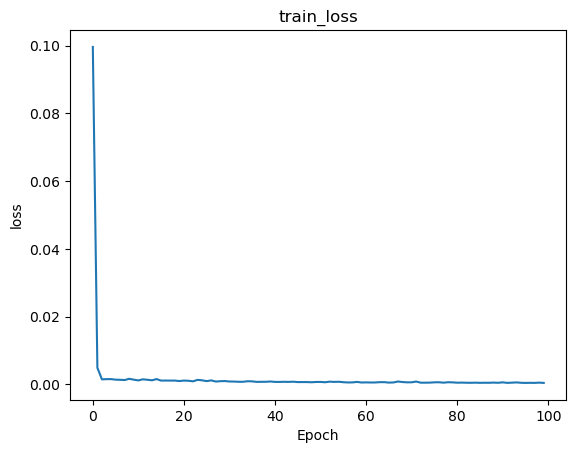

In [37]:
plt.title('train_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.plot(mymodel.history['loss'])

In [38]:
mymodel.history

{'loss': [0.09965069591999054,
  0.004944744054228067,
  0.0015197114553302526,
  0.001579523435793817,
  0.0015949910739436746,
  0.0014297758461907506,
  0.001379504450596869,
  0.0013242833083495498,
  0.0016795891569927335,
  0.0014240788295865059,
  0.0012094511184841394,
  0.0015321439132094383,
  0.0013962670927867293,
  0.0012431064387783408,
  0.0015950317028909922,
  0.0011511343764141202,
  0.0011678125010803342,
  0.001152097131125629,
  0.0011570880888029933,
  0.001020394847728312,
  0.0011571096256375313,
  0.0011014280607923865,
  0.0009362439159303904,
  0.0013640039833262563,
  0.0012340453686192632,
  0.0009975848952308297,
  0.0012133249547332525,
  0.0008736854651942849,
  0.0009751985780894756,
  0.0010166327701881528,
  0.0008874869090504944,
  0.0008643999462947249,
  0.0007996751228347421,
  0.0008024733979254961,
  0.0009623504593037069,
  0.000923486310057342,
  0.0007673206855542958,
  0.0007959087379276752,
  0.0007980576483532786,
  0.000887697737198323,
 

In [39]:
# total_data_set = pd.concat((train_data['Open'], test_data['Open']), axis=0)
total_data_set = pd.concat((train_data['Close'], test_data['Close']), axis=0)
total_data_set

4954    279.5
4955    276.5
4956    276.5
4957    278.0
4958    286.5
        ...  
5180    429.0
5181    426.0
5182    431.0
5183    427.0
5184    435.0
Name: Close, Length: 771, dtype: float64

In [40]:
inputs = total_data_set[len(total_data_set) - len(test_data) - 10:].values
inputs

/tmp/ipykernel_8491/3323579783.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  inputs = total_data_set[len(total_data_set) - len(test_data) - 10:].values


array([615. , 608. , 600. , 607. , 602. , 608. , 605. , 601. , 599. ,
       600. , 279.5, 276.5, 276.5, 278. , 286.5, 282. , 290. , 293.5,
       296.5, 293.5, 293. , 290. , 294. , 293. , 293. , 293.5, 294.5,
       298.5, 299.5, 298.5, 299. , 307. , 310.5, 311. , 309. , 305.5,
       301. , 305. , 304. , 303.5, 307. , 311. , 315. , 313.5, 311. ,
       309. , 307. , 307. , 311. , 309.5, 305. , 307.5, 307. , 306. ,
       312. , 313. , 316. , 313.5, 319. , 331.5, 339. , 336. , 345. ,
       344.5, 335. , 329. , 334. , 332. , 333. , 333. , 338. , 334.5,
       331. , 339. , 339.5, 332. , 329.5, 329.5, 337.5, 339.5, 341.5,
       346. , 340. , 334.5, 333. , 333. , 316.5, 320. , 315. , 325. ,
       327.5, 332.5, 328. , 327.5, 331.5, 335. , 335. , 335. , 331.5,
       322. , 326.5, 325.5, 325. , 320. , 322. , 318.5, 316. , 311. ,
       317.5, 320.5, 323. , 315. , 305.5, 307. , 302. , 294. , 290. ,
       276.5, 268. , 260. , 248. , 270. , 255. , 267.5, 277. , 280. ,
       273. , 267.5,

In [41]:
inputs = inputs.reshape(-1,1)
inputs

array([[615. ],
       [608. ],
       [600. ],
       [607. ],
       [602. ],
       [608. ],
       [605. ],
       [601. ],
       [599. ],
       [600. ],
       [279.5],
       [276.5],
       [276.5],
       [278. ],
       [286.5],
       [282. ],
       [290. ],
       [293.5],
       [296.5],
       [293.5],
       [293. ],
       [290. ],
       [294. ],
       [293. ],
       [293. ],
       [293.5],
       [294.5],
       [298.5],
       [299.5],
       [298.5],
       [299. ],
       [307. ],
       [310.5],
       [311. ],
       [309. ],
       [305.5],
       [301. ],
       [305. ],
       [304. ],
       [303.5],
       [307. ],
       [311. ],
       [315. ],
       [313.5],
       [311. ],
       [309. ],
       [307. ],
       [307. ],
       [311. ],
       [309.5],
       [305. ],
       [307.5],
       [307. ],
       [306. ],
       [312. ],
       [313. ],
       [316. ],
       [313.5],
       [319. ],
       [331.5],
       [339. ],
       [336. ],
       [

In [42]:
inputs = sc.transform(inputs)
inputs

array([[0.86352941],
       [0.84705882],
       [0.82823529],
       [0.84470588],
       [0.83294118],
       [0.84705882],
       [0.84      ],
       [0.83058824],
       [0.82588235],
       [0.82823529],
       [0.07411765],
       [0.06705882],
       [0.06705882],
       [0.07058824],
       [0.09058824],
       [0.08      ],
       [0.09882353],
       [0.10705882],
       [0.11411765],
       [0.10705882],
       [0.10588235],
       [0.09882353],
       [0.10823529],
       [0.10588235],
       [0.10588235],
       [0.10705882],
       [0.10941176],
       [0.11882353],
       [0.12117647],
       [0.11882353],
       [0.12      ],
       [0.13882353],
       [0.14705882],
       [0.14823529],
       [0.14352941],
       [0.13529412],
       [0.12470588],
       [0.13411765],
       [0.13176471],
       [0.13058824],
       [0.13882353],
       [0.14823529],
       [0.15764706],
       [0.15411765],
       [0.14823529],
       [0.14352941],
       [0.13882353],
       [0.138

In [46]:
x_test = []
for i in range(n, len(inputs)):
    x_test.append(inputs[i-n:i-1, 0])
x_test = np.array(x_test)
x_test

array([[0.86352941, 0.84705882, 0.82823529, ..., 0.09882353, 0.10705882,
        0.11411765],
       [0.84705882, 0.82823529, 0.84470588, ..., 0.10705882, 0.11411765,
        0.10705882],
       [0.82823529, 0.84470588, 0.83294118, ..., 0.11411765, 0.10705882,
        0.10588235],
       ...,
       [0.42588235, 0.40235294, 0.42588235, ..., 0.43529412, 0.44235294,
        0.42588235],
       [0.40235294, 0.42588235, 0.42117647, ..., 0.44235294, 0.42588235,
        0.41882353],
       [0.42588235, 0.42117647, 0.44      , ..., 0.42588235, 0.41882353,
        0.43058824]])

In [47]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test

array([[[0.86352941],
        [0.84705882],
        [0.82823529],
        ...,
        [0.09882353],
        [0.10705882],
        [0.11411765]],

       [[0.84705882],
        [0.82823529],
        [0.84470588],
        ...,
        [0.10705882],
        [0.11411765],
        [0.10705882]],

       [[0.82823529],
        [0.84470588],
        [0.83294118],
        ...,
        [0.11411765],
        [0.10705882],
        [0.10588235]],

       ...,

       [[0.42588235],
        [0.40235294],
        [0.42588235],
        ...,
        [0.43529412],
        [0.44235294],
        [0.42588235]],

       [[0.40235294],
        [0.42588235],
        [0.42117647],
        ...,
        [0.44235294],
        [0.42588235],
        [0.41882353]],

       [[0.42588235],
        [0.42117647],
        [0.44      ],
        ...,
        [0.42588235],
        [0.41882353],
        [0.43058824]]])

In [48]:
predicted_stock_price = model.predict(x_test)
predicted_stock_price

7/7 [==============================] - 0s 27ms/step


array([[0.09515554],
       [0.13521484],
       [0.14719936],
       [0.12767088],
       [0.1090172 ],
       [0.10625595],
       [0.11464383],
       [0.12112199],
       [0.1204982 ],
       [0.12026089],
       [0.12266767],
       [0.12525949],
       [0.12438489],
       [0.13158762],
       [0.14439537],
       [0.1534648 ],
       [0.1526734 ],
       [0.14368376],
       [0.13210885],
       [0.13122582],
       [0.13576208],
       [0.13816133],
       [0.14019579],
       [0.14551583],
       [0.15505943],
       [0.16038664],
       [0.1575434 ],
       [0.15028432],
       [0.14380895],
       [0.14207223],
       [0.14780053],
       [0.1516594 ],
       [0.14600013],
       [0.14097425],
       [0.14012772],
       [0.14143479],
       [0.14897063],
       [0.1563058 ],
       [0.16211873],
       [0.16148087],
       [0.16454017],
       [0.1832844 ],
       [0.20919819],
       [0.21986553],
       [0.2256865 ],
       [0.22794107],
       [0.21902284],
       [0.203

In [49]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[288.4411 ],
       [305.46628],
       [310.55972],
       [302.26013],
       [294.3323 ],
       [293.15878],
       [296.72363],
       [299.47684],
       [299.21173],
       [299.11087],
       [300.13376],
       [301.23526],
       [300.8636 ],
       [303.92474],
       [309.368  ],
       [313.22253],
       [312.88617],
       [309.06558],
       [304.14627],
       [303.77097],
       [305.69888],
       [306.71857],
       [307.58322],
       [309.8442 ],
       [313.90024],
       [316.1643 ],
       [314.95596],
       [311.87082],
       [309.1188 ],
       [308.38068],
       [310.81522],
       [312.45523],
       [310.05005],
       [307.91403],
       [307.5543 ],
       [308.10977],
       [311.3125 ],
       [314.42996],
       [316.90045],
       [316.62936],
       [317.92957],
       [325.89587],
       [336.90924],
       [341.44284],
       [343.91675],
       [344.87494],
       [341.0847 ],
       [334.457  ],
       [332.76434],
       [333.89545],


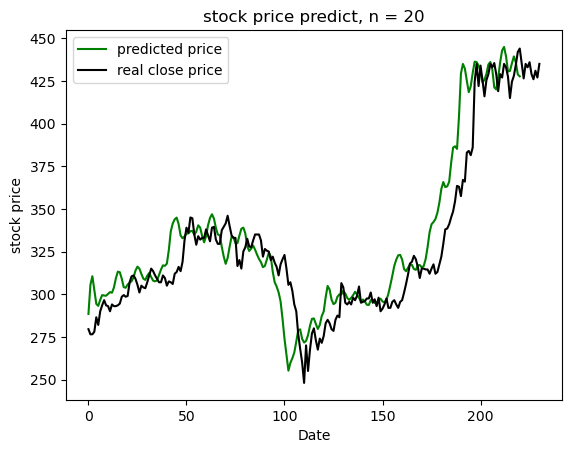

In [50]:
# plt.plot(test_data['Open'].values, color='black', label = "real open price")
plt.plot(predicted_stock_price, color='green', label = "predicted price")
plt.plot(test_data['Close'].values, color='black', label = "real close price")
plt.title('stock price predict, n = {}'.format(n))
plt.xlabel('Date')
plt.ylabel('stock price')
plt.legend()
plt.show()